<a href="https://colab.research.google.com/github/Bhuvaneshwaran-M/House-price-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import Required Libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

In [9]:
# step-1 load dataset
# Replace 'your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('/content/cleaned_merged_heart_dataset.csv')

print ("dataset sample:")
print(df.head())

dataset sample:
   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


In [10]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\nBest Model Metrics:")
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))


Logistic Regression Accuracy: 0.72
Random Forest Accuracy: 0.96

Best Model Metrics:
Accuracy Score: 0.9603174603174603
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       188
           1       0.96      0.96      0.96       190

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Confusion Matrix:
 [[181   7]
 [  8 182]]


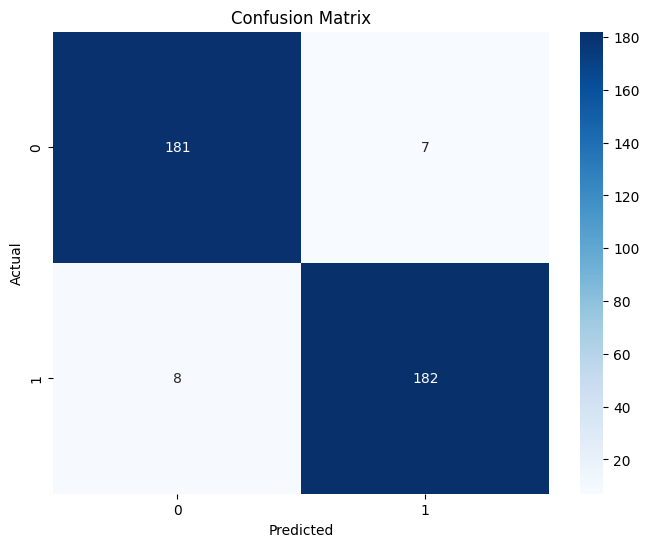

In [17]:
# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: Make Predictions on New Data
new_data = pd.DataFrame({
    'age': [45],
    'sex': [1],
    'cp': [2],
    'trestbps': [130],
    'chol': [230],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [150], # Corrected from 'thalach' to 'thalachh'
    'exang': [0],
    'oldpeak': [0.5],
    'slope': [2],
    'ca': [0],
    'thal': [2]
})

In [20]:
# 1. Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Display Classification Report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_preds))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Step 5: Evaluate the Best Model
best_model = rf_model if rf_accuracy > log_accuracy else log_model
best_preds = rf_preds if rf_accuracy > log_accuracy else log_preds

print("\nBest Model Metrics:")
print("Accuracy Score:", accuracy_score(y_test, best_preds))
print("Classification Report:\n", classification_report(y_test, best_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_preds))

Logistic Regression Accuracy: 0.72

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.63      0.69       188
           1       0.69      0.82      0.75       190

    accuracy                           0.72       378
   macro avg       0.73      0.72      0.72       378
weighted avg       0.73      0.72      0.72       378

Random Forest Accuracy: 0.96

Best Model Metrics:
Accuracy Score: 0.9603174603174603
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       188
           1       0.96      0.96      0.96       190

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378

Confusion Matrix:
 [[181   7]
 [  8 182]]


In [19]:
# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Convert scaled data back to a DataFrame with original feature names for prediction
new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=X.columns)

# Make prediction using the best model
prediction = best_model.predict(new_data_scaled_df)[0]

# Print result
print(
    "\nPrediction for New Data:",
    "At Risk of Heart Disease" if prediction == 1 else "Not at Risk"
)


Prediction for New Data: At Risk of Heart Disease
